# 🚀 SpaceX Launch Data: Linear Regression Analysis

This notebook demonstrates a linear regression analysis using SpaceX launch data. Since we are unable to access the live API, we simulate the data structure for demonstration.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Display settings
sns.set(style="whitegrid")

In [2]:
# Simulate SpaceX launch dataset
np.random.seed(42)
data = pd.DataFrame({
    'payload_mass_kg': np.random.uniform(1000, 8000, 100),
    'success': np.random.binomial(1, 0.8, 100)
})
# We simulate that higher payload might slightly affect success
data['success_probability'] = 0.6 + (data['payload_mass_kg'] / 10000) * 0.3 + np.random.normal(0, 0.05, 100)
data['success_probability'] = data['success_probability'].clip(0, 1)
data.head()

,payload_mass_kg,success,success_probability
0,3621.780832,1,0.674652
1,7655.000145,1,0.841263
2,6123.957593,1,0.798372
3,5190.609389,1,0.720001
4,2092.130483,0,0.756053


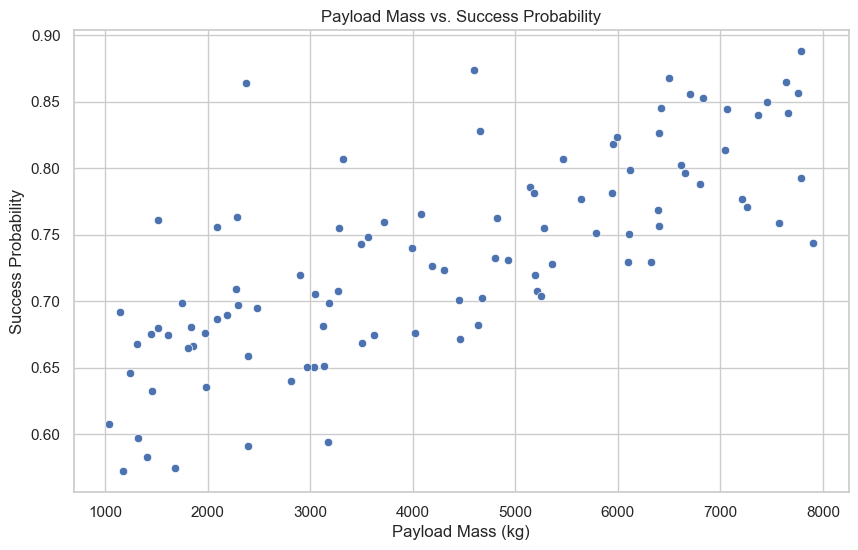

In [3]:
# Visualize the relationship between payload and success probability
plt.figure(figsize=(10, 6))
sns.scatterplot(x='payload_mass_kg', y='success_probability', data=data)
plt.title('Payload Mass vs. Success Probability')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Success Probability')
plt.show()

In [4]:
# Linear regression model
X = data[['payload_mass_kg']]
y = data['success_probability']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')

Mean Squared Error: 0.0017
R^2 Score: 0.6439


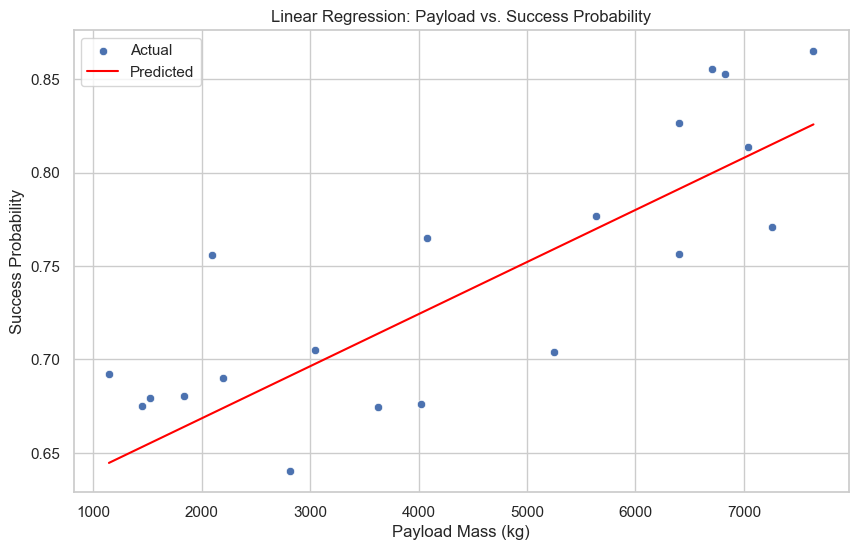

In [5]:
# Plot regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['payload_mass_kg'], y=y_test, label='Actual')
sns.lineplot(x=X_test['payload_mass_kg'], y=y_pred, color='red', label='Predicted')
plt.title('Linear Regression: Payload vs. Success Probability')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Success Probability')
plt.legend()
plt.show()